### In this notebook we are going to look at running a really basic Log reg model on our data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
project_path = ""
data_path = ""

In [3]:
os.chdir(project_path)

In [4]:
from janestreet.data import JaneData
from janestreet.sl_agents import LogisticRegAgent

In [5]:
jane_data = JaneData(data_path)

Done Loading Jane Data
Using seed data None


In [6]:
train_data = jane_data.train_df

In [7]:
train_data.shape

(2390491, 138)

In [8]:
train_data.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [9]:
train_features = jane_data.extract_features(train_data)

In [10]:
train_features.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129
0,1,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,0.0,0.0,-0.989982,...,0.0,0.0,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807
1,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,0.0,0.0,-0.151877,...,0.0,0.0,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684
2,-1,0.812780,-0.256156,0.806463,0.400221,-0.614188,-0.354800,0.0,0.0,5.448261,...,0.0,0.0,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299
3,-1,1.174378,0.344640,0.066872,0.009357,-1.006373,-0.676458,0.0,0.0,4.508206,...,0.0,0.0,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469
4,1,-3.172026,-3.093182,-0.161518,-0.128149,-0.195006,-0.143780,0.0,0.0,2.683018,...,0.0,0.0,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633


In [65]:
train_data.iloc[[0]]["weight"]

0    0.0
Name: weight, dtype: float64

In [62]:
len(np.where(train_data["weight"] > 6)[0]) / len(train_data)

0.12222300774192414

<AxesSubplot:>

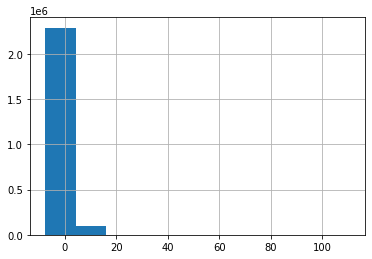

In [11]:
train_features["feature_121"].hist()

<AxesSubplot:>

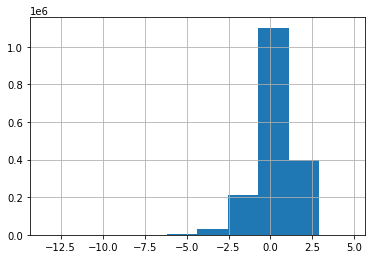

In [12]:
train_features["feature_121"].apply(lambda x: np.log1p(x)).hist()

In [13]:
model_config = {"random_state":0, 'solver':'saga', 'penalty':'elasticnet', 
                            'l1_ratio':.5, 'max_iter':500}

In [14]:
lr = LogisticRegAgent(model_config)

In [15]:
X = train_features.to_numpy()
y = train_data["resp"]

<AxesSubplot:>

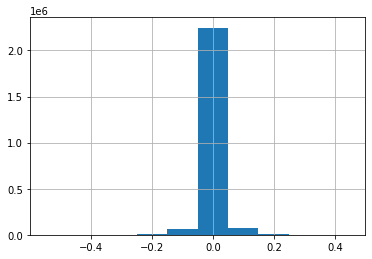

In [16]:
y.hist()

In [17]:
y = np.where(y > 0, 1, y)
y = np.where(y <= 0, 0, y)

(array([1185517.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1204974.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

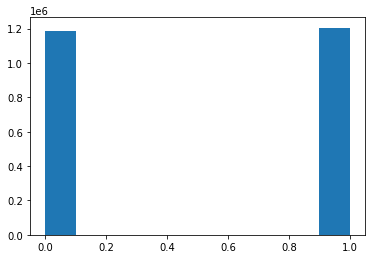

In [25]:
plt.hist(y)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
model = lr.fit(X,y)

/Users/davidsewell/.python-virtualenvs/JaneStreetComp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [21]:
lr._model = model

In [22]:
lr.score(X,y)

0.5217559907148782

In [44]:
predictions = lr._model.predict(X)

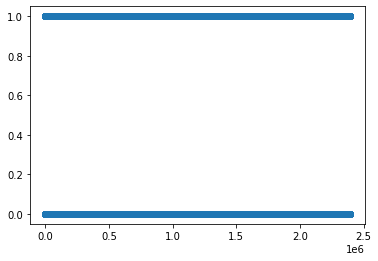

In [48]:
plt.scatter([x for x in range(len(predictions))],predictions)

In [49]:
prob_predict = lr._model.predict_proba(X)

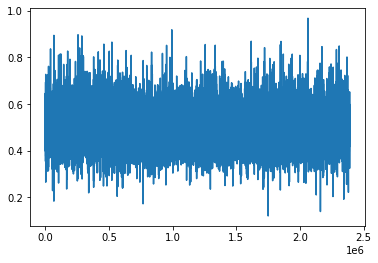

In [50]:
plt.plot(prob_predict[:,1])

In [67]:
lr._model.predict_proba(X[1].reshape((1,len(X[0]))))[0][1]

0.5076016104700848

In [68]:
lr._model.predict(X[1].reshape((1,len(X[0]))))[0]

1.0

In [24]:
lr._model.predict_proba(X[1000].reshape((1,130)))

array([[0.51945656, 0.48054344]])